
READING THE TRAIN AND TEST DATA

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.max_rows = 20000

In [3]:
# from google.colab import drive

# drive.mount('/content/drive')


DATA READING AND CHECKING THE FEATURES AVAILABLE IN THE FILE.

In [4]:
train = pd.read_csv('/content/Train.csv')
train['train_test'] = 'train'
print('Shape:', train.shape)
train.head(5)

test = pd.read_csv('/content/Test.csv')
test['train_test'] = 'test'
print('Shape:', test.shape)
test.head(5)

Shape: (13320, 10)
Shape: (1480, 10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,train_test
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN,test
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN,test
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN,test
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN,test
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN,test


TRAIN DATA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   train_test    13320 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


In [6]:
print('area_type unique count:', train['area_type'].nunique())
print('availability unique count:', train['availability'].nunique())
print('location unique count:', train['location'].nunique())
print('size unique count:', train['size'].nunique())
print('society unique count:', train['society'].nunique())

area_type unique count: 4
availability unique count: 81
location unique count: 1305
size unique count: 31
society unique count: 2688


In [7]:
print('area_type unique values:', train['area_type'].unique())
print('availability unique values:', train['availability'].unique())
print('location unique values:', train['location'].unique())
print('society unique values:', train['society'].unique())
print('size unique value:', train['size'].unique())

area_type unique values: ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability unique values: ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location unique values: ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas naga

TEST DATA

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
 9   train_test    1480 non-null   object 
dtypes: float64(3), object(7)
memory usage: 115.8+ KB


In [9]:
print('area_type unique count:', test['area_type'].nunique())
print('availability unique count:', test['availability'].nunique())
print('location unique count:', test['location'].nunique())
print('size unique count:', test['size'].nunique())
print('society unique count:', test['society'].nunique())

area_type unique count: 4
availability unique count: 51
location unique count: 495
size unique count: 21
society unique count: 594


In [10]:
print('area_type unique values:', test['area_type'].unique())
print('availability unique values:', test['availability'].unique())
print('location unique values:', test['location'].unique())
print('society unique values:', test['society'].unique())
print('size unique value:', test['size'].unique())

area_type unique values: ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability unique values: ['Ready To Move' '18-Apr' '18-Dec' '18-Jul' '19-Dec' '19-Oct' '17-Dec'
 '18-May' '22-Jun' '18-Feb' '18-Aug' '18-Jun' '18-Mar' '20-Dec' '17-Jun'
 '21-Mar' '17-Jul' '15-Oct' 'Immediate Possession' '19-Sep' '17-Jan'
 '19-Jun' '21-May' '22-May' '18-Oct' '18-Sep' '21-Dec' '18-Nov' '17-Nov'
 '19-Jan' '17-May' '19-Mar' '17-Sep' '17-Apr' '20-Jul' '19-Nov' '21-Jan'
 '21-Feb' '20-Jun' '19-May' '21-Jul' '20-Jan' '18-Jan' '19-Feb' '19-Aug'
 '16-Jul' '19-Jul' '17-Aug' '21-Jun' '16-Apr' '20-Aug']
location unique values: ['Brookefield' 'Akshaya Nagar' 'Hennur Road' 'Kodichikkanahalli'
 'Konanakunte' '5th Phase JP Nagar' 'Vijayanagar' 'BEML Layout'
 'Thanisandra' 'NRI Layout' 'Sarjapur' 'Thigalarapalya' 'Kanakapura'
 'Narayanapura' 'Magadi Road' 'Kogilu' 'BTM 2nd Stage' 'Hebbal Kempapura'
 'Electronic City' 'Hosa Road' 'Kengeri Satellite Town Stage 1'
 'Begur Road' 'Harlur' 'Rache

DATA CLEANING AND PREPROCESSING OF TRAIN DATA

In [11]:
housing_df = pd.concat([train, test], axis=0)

In [12]:
housing_df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,18
society,6128
total_sqft,0
bath,80
balcony,678
price,1480
train_test,0


In [13]:
# Filling missing values
housing_df['location'].fillna('Unknown', inplace=True)
housing_df['size'].fillna('0 Unknown', inplace=True)
housing_df['society'].fillna('Unknown', inplace=True)

housing_df['bath'].fillna(housing_df['bath'].mean(), inplace=True)
housing_df['balcony'].fillna(housing_df['balcony'].mean(), inplace=True)

<ipython-input-13-3adba8ae5723>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['location'].fillna('Unknown', inplace=True)
<ipython-input-13-3adba8ae5723>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [14]:
housing_df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,1480
train_test,0


FEATURE ENGINEERING

In [15]:
# Convert size to number of bedrooms
housing_df['BHK'] = housing_df['size'].apply(lambda x: str(x).split(' ')[0]).astype(int)

In [16]:
# Function to extract the month or keep the string as it is
def extract_month(value):
    # If the value contains a date in the format '19-May', extract the month part
    match = re.search(r'\d{1,2}-(\w+)', value)
    if match:
        return match.group(1)  # Return the month (e.g., 'May')
    return value  # Keep the string if no date is found (e.g., 'Immediate Possession')

# Apply the function to the 'availability' column
# Calling function
housing_df['month'] = housing_df['availability'].apply(extract_month)

In [17]:
def convert_sqft_to_num(x):
    try:
        # If it's a range (e.g. "1200 - 1500"), take the average
        if '-' in str(x):
            vals = x.split('-')
            return (float(vals[0]) + float(vals[1])) / 2
        # Otherwise return the number directly
        return float(x)
    except:
        return np.nan

# Calling Function
housing_df['total_sqft'] = housing_df['total_sqft'].apply(convert_sqft_to_num)

# Fill null values
housing_df['total_sqft'].fillna(housing_df['total_sqft'].mean(), inplace=True)

<ipython-input-17-6aca7354ca9f>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['total_sqft'].fillna(housing_df['total_sqft'].mean(), inplace=True)


In [18]:
housing_df = housing_df.drop(['size', 'availability'], axis = 1)

OUTLIER TREATMENT

In [19]:
# Define a function to detect and handle outliers using IQR method
def treat_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping (or optionally, you can remove outliers)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Select numerical columns for outlier treatment
numerical_columns = housing_df.select_dtypes(include=[np.number]).columns
print('numerical_columns', numerical_columns)

# Apply outlier treatment to each numerical column
for column in numerical_columns:
    housing_df = treat_outliers_iqr(housing_df, column)

numerical_columns Index(['total_sqft', 'bath', 'balcony', 'price', 'BHK'], dtype='object')


In [20]:
housing_df.head()

,area_type,location,society,total_sqft,bath,balcony,price,train_test,BHK,month
0,Super built-up Area,Electronic City Phase II,Coomee,1056.000,2.0,1.0,39.07,train,2.0,Dec
1,Plot Area,Chikka Tirupathi,Theanmp,2550.625,4.5,3.0,120.00,train,4.0,Ready To Move
2,Built-up Area,Uttarahalli,Unknown,1440.000,2.0,3.0,62.00,train,3.0,Ready To Move
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521.000,3.0,1.0,95.00,train,3.0,Ready To Move
4,Super built-up Area,Kothanur,Unknown,1200.000,2.0,1.0,51.00,train,2.0,Ready To Move


In [21]:
one_hot_encoded_data = pd.get_dummies(housing_df, columns = ['area_type','location', 'society', 'month'], dtype = int)

In [22]:
one_hot_encoded_data.head()

,total_sqft,bath,balcony,price,train_test,BHK,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Hoodi,location_ Kanakpura Road,location_ Mysore Highway,location_ Rachenahalli,location_ Sector 1 HSR Layout,location_ Thanisandra,location_ Whitefield,location_ ittamadu,location_ south,location_#NAME?,location_1 Annasandrapalya,location_1 Giri Nagar,location_1 Immadihalli,location_1 Ramamurthy Nagar,location_12th cross srinivas nagar banshankari 3rd stage,location_15th Block Hbr Layout,location_1A Block Koramangala,location_1Channasandra,location_1Hanuman Nagar,location_1Hoysalanagar,location_1Kasavanhalli,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Domlur,location_1st Stage Indira Nagar,location_1st Stage Radha Krishna Layout,location_2 Bedroom Furnished Farm House in Kolar Road,location_2Electronic City Phase II,location_2nd Block Bel Layout,...,society_Vincyat,society_Viockit,society_Viodspr,society_Viony H,society_ViortCo,society_Viowsen,society_Visic C,society_VisicCl,society_Visom B,society_Vitat H,society_Vithm R,society_Viuliap,society_Vixirri,society_VmlleRo,society_Vrensn,society_Vrenty,society_Wharl P,society_Whosone,society_Wiass G,society_Wiaysld,society_Winerri,society_Wiowsri,society_WishiVa,society_Wisic C,society_WoarkEm,society_Xeitaa,society_YCnce R,society_YMarlti,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo,month_Apr,month_Aug,month_Dec,month_Feb,month_Immediate Possession,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Ready To Move,month_Sep
0,1056.000,2.0,1.0,39.07,train,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2550.625,4.5,3.0,120.00,train,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1440.000,2.0,3.0,62.00,train,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1521.000,3.0,1.0,95.00,train,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1200.000,2.0,1.0,51.00,train,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


EDA

In [23]:
housing_df_train = housing_df[housing_df['train_test'] == 'train']
housing_df_test = housing_df[housing_df['train_test'] == 'test']

In [24]:
housing_df_train.head()

,area_type,location,society,total_sqft,bath,balcony,price,train_test,BHK,month
0,Super built-up Area,Electronic City Phase II,Coomee,1056.000,2.0,1.0,39.07,train,2.0,Dec
1,Plot Area,Chikka Tirupathi,Theanmp,2550.625,4.5,3.0,120.00,train,4.0,Ready To Move
2,Built-up Area,Uttarahalli,Unknown,1440.000,2.0,3.0,62.00,train,3.0,Ready To Move
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521.000,3.0,1.0,95.00,train,3.0,Ready To Move
4,Super built-up Area,Kothanur,Unknown,1200.000,2.0,1.0,51.00,train,2.0,Ready To Move


DISTRIBUTION OF DATA

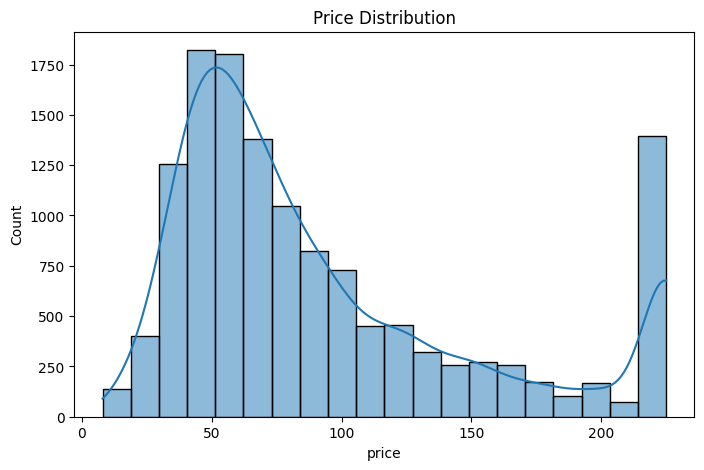

In [25]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

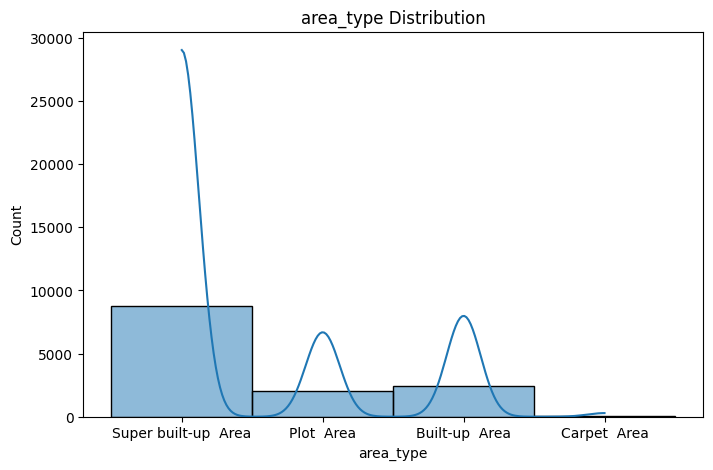

In [26]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['area_type'], bins=20, kde=True)
plt.title('area_type Distribution')
plt.show()

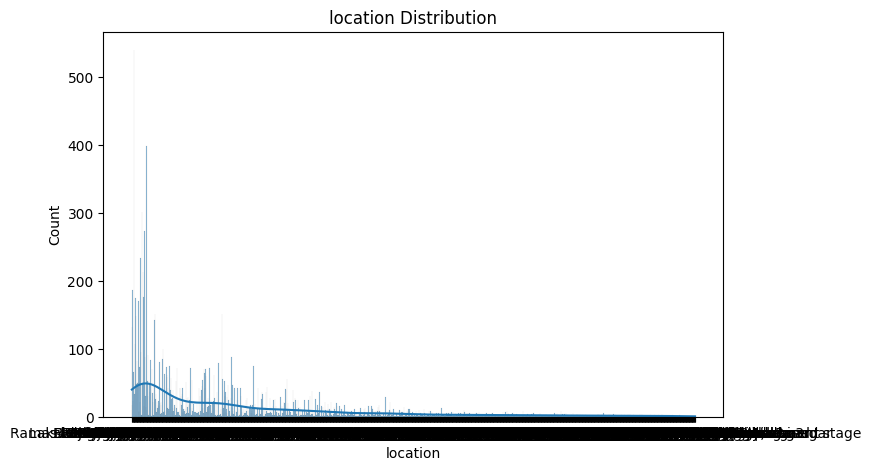

In [27]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['location'], bins=20, kde=True)
plt.title('location Distribution')
plt.show()

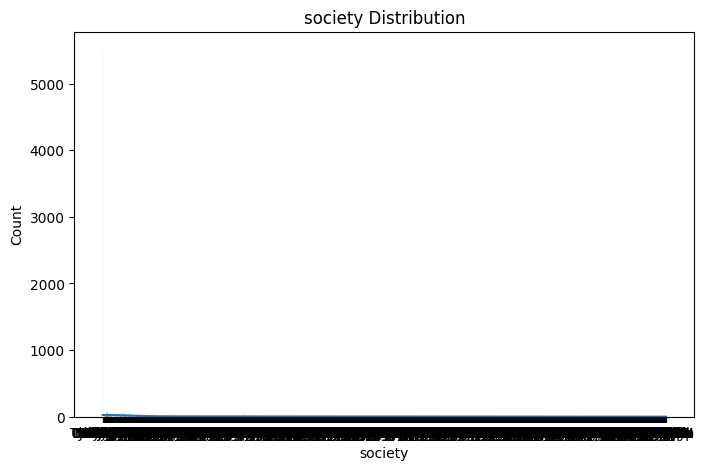

In [28]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['society'], bins=20, kde=True)
plt.title('society Distribution')
plt.show()

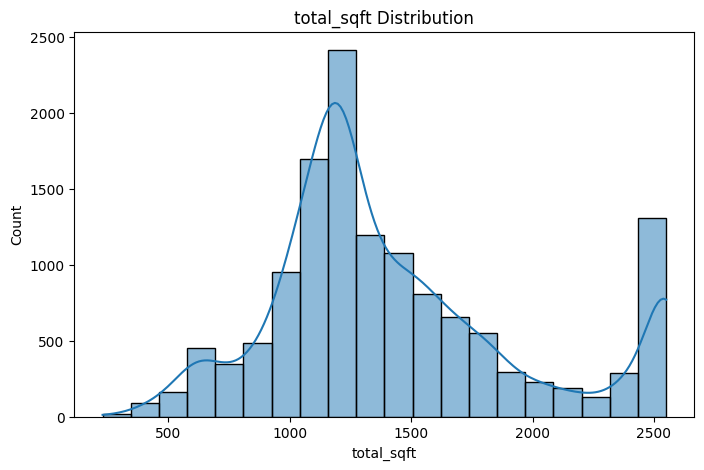

In [29]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['total_sqft'], bins=20, kde=True)
plt.title('total_sqft Distribution')
plt.show()

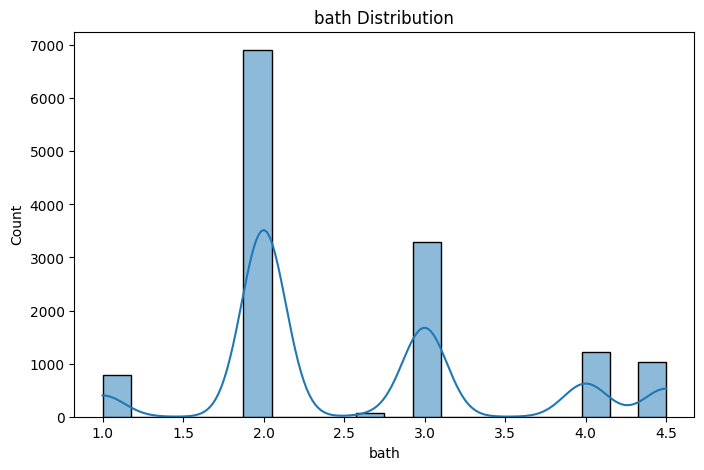

In [30]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['bath'], bins=20, kde=True)
plt.title('bath Distribution')
plt.show()

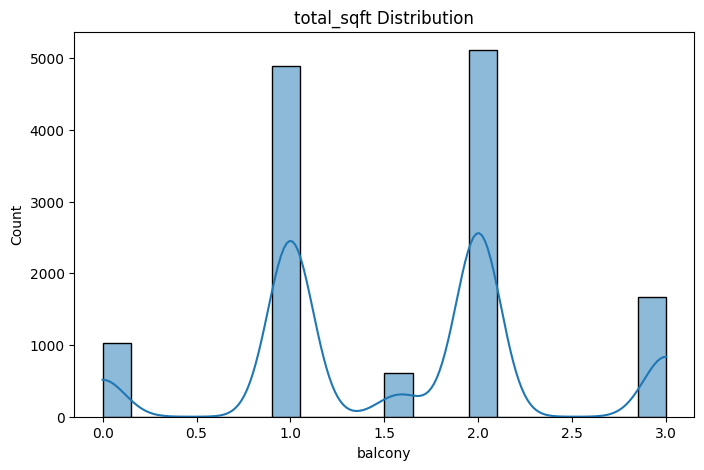

In [31]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['balcony'], bins=20, kde=True)
plt.title('total_sqft Distribution')
plt.show()

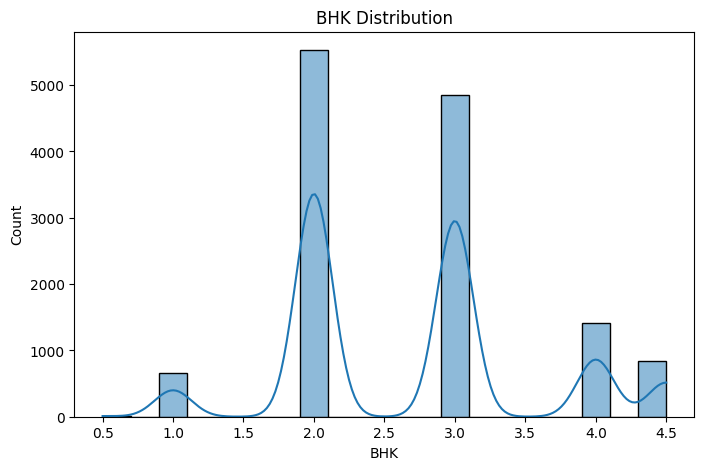

In [32]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['BHK'], bins=20, kde=True)
plt.title('BHK Distribution')
plt.show()

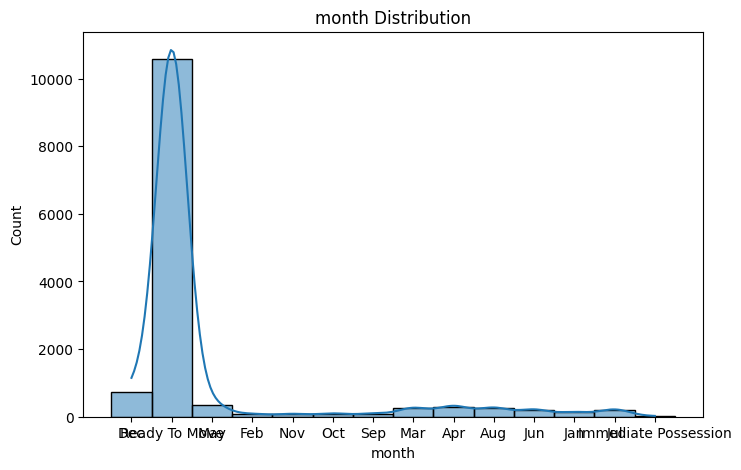

In [33]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['month'], bins=20, kde=True)
plt.title('month Distribution')
plt.show()

VISUALIZE THEIR RELATIONSHIP

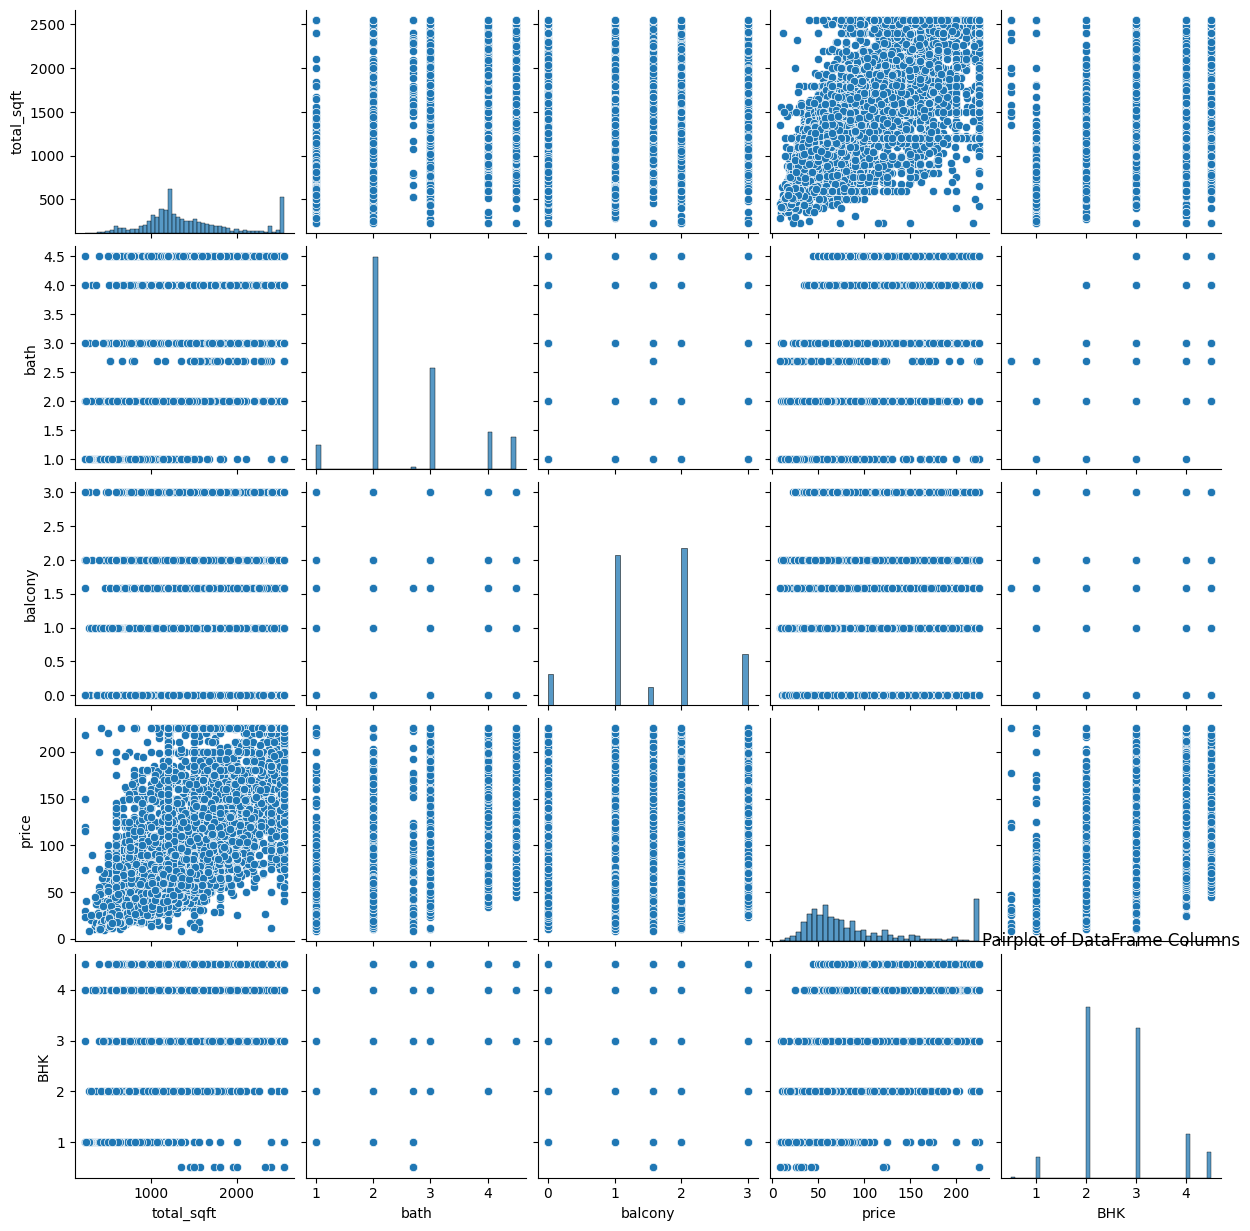

In [34]:
sb.pairplot(housing_df_train)
plt.title('Pairplot of DataFrame Columns')
plt.show()

DATA FOR MODELLING

In [35]:
processed_train = one_hot_encoded_data[one_hot_encoded_data['train_test'] == 'train']
processed_test = one_hot_encoded_data[one_hot_encoded_data['train_test'] == 'test']

In [36]:
processed_train = processed_train.drop(['train_test'], axis = 1)
processed_test = processed_test.drop(['train_test'], axis = 1)

In [37]:
print(processed_train.describe())

         total_sqft          bath       balcony         price           BHK  \
count  13320.000000  13320.000000  13320.000000  13320.000000  13320.000000   
mean    1430.563287      2.570458      1.584274     93.334921      2.685135   
std      526.282731      0.915892      0.798361     59.709180      0.877339   
min      229.625000      1.000000      0.000000      8.000000      0.500000   
25%     1100.000000      2.000000      1.000000     50.000000      2.000000   
50%     1279.500000      2.000000      2.000000     72.000000      3.000000   
75%     1678.000000      3.000000      2.000000    120.000000      3.000000   
max     2550.625000      4.500000      3.000000    225.000000      4.500000   

       area_type_Built-up  Area  area_type_Carpet  Area  area_type_Plot  Area  \
count              13320.000000            13320.000000          13320.000000   
mean                   0.181532                0.006532              0.152027   
std                    0.385472              

CORRELATION

In [38]:
# # Correlation heatmap
# plt.figure(figsize=(10, 6))
# sb.heatmap(processed_train.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

MODEL TRAINING

In [39]:
# X_train =  processed_train.drop('price', axis=1)
# y_train = processed_train['price']

# X_test =  processed_test.drop('price', axis=1)
# y_test = processed_test['price']

X =  processed_train.drop('price', axis=1)
y = processed_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

TRANSFORMATIONS

In [40]:
# Create scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

Standardization

In [41]:
# Apply StandardScaler and MinMaxScaler to the training and test data
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()

# Standardizing all numerical features
X_train_standardized = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_standardized = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns)

Normalization

In [42]:
# Normalize (MinMaxScaler) if needed. Example on different columns
X_train_normalized = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns)

In [43]:
X_train = X_train_standardized
X_test = X_test_standardized

LinearRegression

In [44]:
# Linear Regression
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

linear_y_pred = linear_model.predict(X_test)

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
mae = mean_absolute_error(y_test, linear_y_pred)
mse = mean_squared_error(y_test, linear_y_pred)
r2 = r2_score(y_test, linear_y_pred)

In [46]:
model_performance = pd.DataFrame(columns=['Algorithm', 'RMSE', 'MAE', 'MSE', 'R²'])

In [47]:
# Create a new row as a DataFrame
new_row = pd.DataFrame({
    'Algorithm': ['Linear Regression'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse],
    'R²': [r2]
})

# Concatenate the new row with the model_performance DataFrame
model_performance = pd.concat([model_performance, new_row], ignore_index=True)

<ipython-input-47-c450450a1ef9>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance = pd.concat([model_performance, new_row], ignore_index=True)


Ridge Regression

Ridge Regression (L2 regularization)

In [48]:
# Ridge Regression
ridge_model = Ridge()

# Ridge Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1, 10, 100]}

ridge_grid_search = GridSearchCV(estimator=Ridge(), param_grid=ridge_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

ridge_grid_search.fit(X_train, y_train)

best_ridge_model = ridge_grid_search.best_estimator_
print('best_ridge_model:', best_ridge_model)

ridge_y_pred = best_ridge_model.predict(X_test)

best_ridge_model: Ridge(alpha=100)


In [49]:
rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
mae = mean_absolute_error(y_test, ridge_y_pred)
mse = mean_squared_error(y_test, ridge_y_pred)
r2 = r2_score(y_test, ridge_y_pred)

In [50]:
# Create a new row as a DataFrame
new_row = pd.DataFrame({
    'Algorithm': ['Ridge Regression'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse],
    'R²': [r2]
})

# Concatenate the new row with the model_performance DataFrame
model_performance = pd.concat([model_performance, new_row], ignore_index=True)

LASSO MODEL

Lasso Regression (L1 regularization)

In [51]:
lasso_model = Lasso()

# Lasso Hyperparameter Tuning
lasso_params = {'alpha': [0.1, 1, 10, 100]}

lasso_grid_search = GridSearchCV(estimator=Lasso(), param_grid=lasso_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

lasso_grid_search.fit(X_train, y_train)

best_lasso_model = lasso_grid_search.best_estimator_
print('best_lasso_model', best_lasso_model)

lasso_y_pred = best_lasso_model.predict(X_test)

best_lasso_model Lasso(alpha=0.1)


In [52]:
rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
mae = mean_absolute_error(y_test, lasso_y_pred)
mse = mean_squared_error(y_test, lasso_y_pred)
r2 = r2_score(y_test, lasso_y_pred)

In [53]:
# Create a new row as a DataFrame
new_row = pd.DataFrame({
    'Algorithm': ['Lasso Regression'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse],
    'R²': [r2]
})

# Concatenate the new row with the model_performance DataFrame
model_performance = pd.concat([model_performance, new_row], ignore_index=True)

RANDOM FOREST : ensemble methods

In [54]:
# Random Forest Hyperparameter Tuning
rf_params = {'n_estimators': [200, 300], 'max_depth': [None, 10]}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
print('best_rf_model', best_rf_model)

rf_y_pred = best_rf_model.predict(X_test)

best_rf_model RandomForestRegressor(n_estimators=300, random_state=42)


In [55]:
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
mae = mean_absolute_error(y_test, rf_y_pred)
mse = mean_squared_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)

In [56]:
# Create a new row as a DataFrame
new_row = pd.DataFrame({
    'Algorithm': ['RANDOM FOREST Regression'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse],
    'R²': [r2]
})

# Concatenate the new row with the model_performance DataFrame
model_performance = pd.concat([model_performance, new_row], ignore_index=True)

Gradient Boosting: gradient descent

In [57]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train, y_train)

gb_y_pred = gb_model.predict(X_test)

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))
mae = mean_absolute_error(y_test, gb_y_pred)
mse = mean_squared_error(y_test, gb_y_pred)
r2 = r2_score(y_test, gb_y_pred)

In [59]:
# Create a new row as a DataFrame
new_row = pd.DataFrame({
    'Algorithm': ['Gradient Boosting Regression'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse],
    'R²': [r2]
})

# Concatenate the new row with the model_performance DataFrame
model_performance = pd.concat([model_performance, new_row], ignore_index=True)

XGBoost Regressor : Bagging and boosting

In [60]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# XGBoost Hyperparameter Tuning
xgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

xgb_grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=xgb_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

xgb_grid_search.fit(X_train, y_train)

best_xgb_model = xgb_grid_search.best_estimator_
print('best_xgb_model', best_xgb_model)

xgb_y_pred = best_xgb_model.predict(X_test)

best_xgb_model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [61]:
rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
mae = mean_absolute_error(y_test, xgb_y_pred)
mse = mean_squared_error(y_test, xgb_y_pred)
r2 = r2_score(y_test, xgb_y_pred)

In [62]:
# Create a new row as a DataFrame
new_row = pd.DataFrame({
    'Algorithm': ['XG Boosting Regression'],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse],
    'R²': [r2]
})

# Concatenate the new row with the model_performance DataFrame
model_performance = pd.concat([model_performance, new_row], ignore_index=True)

MODEL PERFORMANCE

In [63]:
model_performance.head(100)

,Algorithm,RMSE,MAE,MSE,R²
0,Linear Regression,1.226535e+15,1.377918e+14,1.504388e+30,-4.270356e+26
1,Ridge Regression,2.758508e+01,1.838970e+01,7.609369e+02,7.840005e-01
2,Lasso Regression,2.731045e+01,1.809573e+01,7.458606e+02,7.882800e-01
3,RANDOM FOREST Regression,2.895869e+01,1.663341e+01,8.386055e+02,7.619535e-01
4,Gradient Boosting Regression,2.962006e+01,2.052301e+01,8.773480e+02,7.509560e-01
5,XG Boosting Regression,2.626458e+01,1.687959e+01,6.898279e+02,8.041855e-01


<ipython-input-64-34024bad23a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='RMSE', y='Algorithm', data=model_performance, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

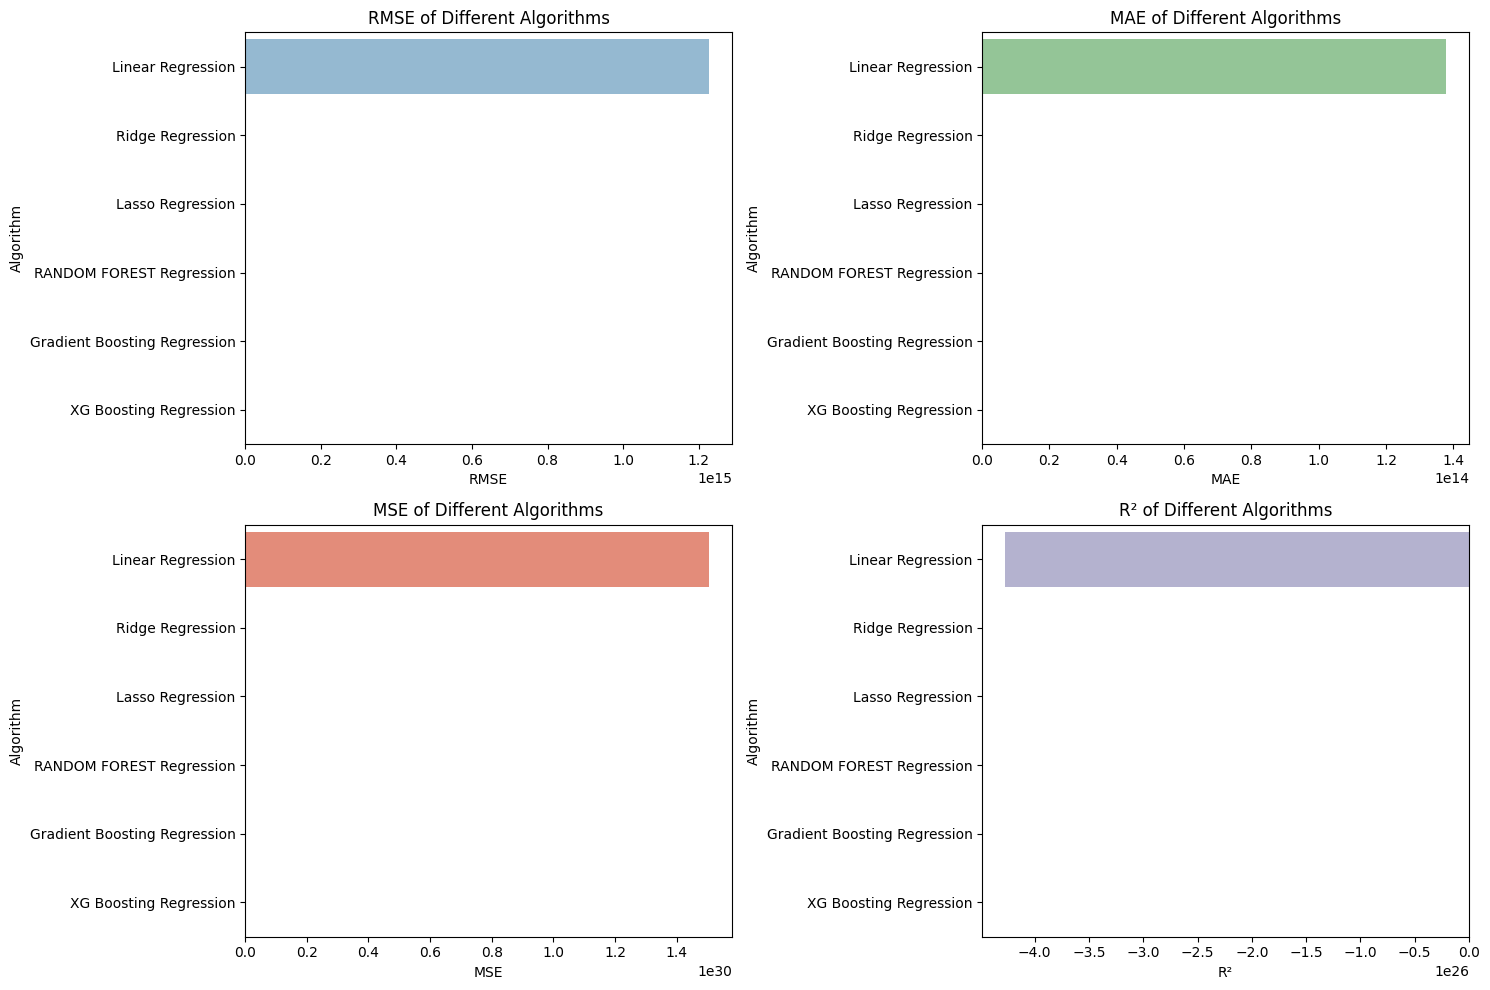

In [64]:
# Plotting RMSE, MAE, MSE, and R²
plt.figure(figsize=(15, 10))

# RMSE
plt.subplot(2, 2, 1)
sb.barplot(x='RMSE', y='Algorithm', data=model_performance, palette='Blues_d')
plt.title('RMSE of Different Algorithms')

# MAE
plt.subplot(2, 2, 2)
sb.barplot(x='MAE', y='Algorithm', data=model_performance, palette='Greens_d')
plt.title('MAE of Different Algorithms')

# MSE
plt.subplot(2, 2, 3)
sb.barplot(x='MSE', y='Algorithm', data=model_performance, palette='Reds_d')
plt.title('MSE of Different Algorithms')

# R²
plt.subplot(2, 2, 4)
sb.barplot(x='R²', y='Algorithm', data=model_performance, palette='Purples_d')
plt.title('R² of Different Algorithms')

plt.tight_layout()
plt.show()

Selecting the best modal

In [65]:
# Find the algorithm with the lowest RMSE
best_model = model_performance.loc[model_performance['RMSE'].idxmin(), 'Algorithm']

# Output the best model name
print(f"The algorithm with the lowest RMSE is: {best_model}")

The algorithm with the lowest RMSE is: XG Boosting Regression


TRAIN DATA : PREDICTION

In [66]:
if best_model == 'Linear Regression':
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_y_pred = linear_model.predict(X_test)

elif best_model == 'Ridge Regression':
    # Ridge Regression with specified alpha
    ridge_model = Ridge(alpha=100)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred = ridge_model.predict(X_test)

elif best_model == 'Lasso Regression':
    # Lasso Regression with specified alpha
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)

elif best_model == 'Random Forest Regression':
    # Random Forest Regression with specified parameters
    rf_model = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_y_pred = rf_model.predict(X_test)

elif best_model == 'Gradient Boosting Regression':
    # Gradient Boosting Regression
    gb_model = GradientBoostingRegressor(random_state=42)
    gb_model.fit(X_train, y_train)
    gb_y_pred = gb_model.predict(X_test)

elif best_model == 'XG Boosting Regression':
    # XG Boosting Regression with specified parameters
    xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.2, max_depth=7, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_y_pred = xgb_model.predict(X_test)

In [67]:
print(xgb_y_pred)

[ 48.333603 125.84396   92.88808  ...  51.568607 210.4356   169.26163 ]


WRITING PREDICTION IN CSV

In [68]:
# Convert predictions to DataFrame
df_predictions = pd.DataFrame(xgb_y_pred)

# Save to CSV
output_file = 'predictions_train.csv'
df_predictions.to_csv(output_file, index=False)

TEST DATA : PREDICTION

In [69]:
X_train =  processed_train.drop('price', axis=1)
y_train = processed_train['price']

X_test =  processed_test.drop('price', axis=1)
y_test = processed_test['price']

TRANSFORMATIONS

In [70]:
# Create scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

Standardization

In [71]:
# Apply StandardScaler and MinMaxScaler to the training and test data
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()

# Standardizing all numerical features
X_train_standardized = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_standardized = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns)

Normalization

In [72]:
# Normalize (MinMaxScaler) if needed. Example on different columns
X_train_normalized = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns)

In [73]:
X_train = X_train_standardized
X_test = X_test_standardized

In [74]:
if best_model == 'Linear Regression':
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_y_pred = linear_model.predict(X_test)

elif best_model == 'Ridge Regression':
    # Ridge Regression with specified alpha
    ridge_model = Ridge(alpha=100)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred = ridge_model.predict(X_test)

elif best_model == 'Lasso Regression':
    # Lasso Regression with specified alpha
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)

elif best_model == 'Random Forest Regression':
    # Random Forest Regression with specified parameters
    rf_model = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_y_pred = rf_model.predict(X_test)

elif best_model == 'Gradient Boosting Regression':
    # Gradient Boosting Regression
    gb_model = GradientBoostingRegressor(random_state=42)
    gb_model.fit(X_train, y_train)
    gb_y_pred = gb_model.predict(X_test)

elif best_model == 'XG Boosting Regression':
    # XG Boosting Regression with specified parameters
    xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.2, max_depth=7, random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_y_pred = xgb_model.predict(X_test)

In [75]:
print(xgb_y_pred)

[ 59.61219  188.75989  185.92836  ...  51.550034  57.587257  65.94612 ]


WRITING PREDICTION IN CSV

In [76]:
# Convert predictions to DataFrame
df_predictions = pd.DataFrame(xgb_y_pred)

# Save to CSV
output_file = 'predictions_test.csv'
df_predictions.to_csv(output_file, index=False)